In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import os
import matplotlib.pyplot as plt

# Data cleaning

In [167]:
foldernames = [
    './TRAININGS/non_moral-02_06_2022__19:38:54',
    './TRAININGS/personal_moral-02_06_2022__20:06:49',
    './TRAININGS/impersonal_moral-02_06_2022__20:06:25'
]
labels = ['non_moral', 'personal_moral', 'impersonal_moral']
dfs = []

for label, foldername in zip(labels, foldernames):
    df = pd.read_csv(open(foldername+'/results.csv', 'r'))
    df['exp'] = label
    df['a'] = df['a'].str.lower()
    df = df[df['q_id']==0]
    df['yes'] = df['a'].str.contains(pat='\W*(yes)\W*', regex=True)
    df['no'] = df['a'].str.contains(pat='\W*(no)\W*', regex=True)
    df['unclear'] = df['yes'] == df['no']
    df['val'] = None
    df.loc[df['yes']==1, 'val'] = 'yes'
    df.loc[df['no']==1, 'val'] = 'no'
    df.loc[df['unclear']==1, 'val'] = 'unclear'
    
    dfs.append(df.copy())
    
df = pd.concat(dfs)

exp = df['exp'].unique()
d = {}
for e in exp:
    d[e] = df[df['exp']==e].groupby('iter').mean()
df




/tmp/ipykernel_11803/1907044587.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat='\W*(yes)\W*', regex=True)
/tmp/ipykernel_11803/1907044587.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat='\W*(no)\W*', regex=True)


,Unnamed: 0,q_id,question,iter,a_id,a,exp,yes,no,unclear,val
0,0,0,You are a farm worker driving a turnip-harvest...,0,0,\nyes.,non_moral,True,False,False,yes
2,2,0,You are a farm worker driving a turnip-harvest...,1,0,"\nyes, i would turn my turnip-picking machine ...",non_moral,True,False,False,yes
4,4,0,You are a farm worker driving a turnip-harvest...,2,0,"\nyes, i would turn my turnip-picking machine ...",non_moral,True,False,False,yes
6,6,0,You are a farm worker driving a turnip-harvest...,3,0,"\nyes, i would turn my machine to the right in...",non_moral,True,False,False,yes
8,8,0,You are a farm worker driving a turnip-harvest...,4,0,"\nyes, i would turn my machine to the right in...",non_moral,True,False,False,yes
...,...,...,...,...,...,...,...,...,...,...,...
310,310,0,You are walking down the street when you come ...,5,0,"\nno, it is not appropriate for you to keep th...",impersonal_moral,False,True,False,no
312,312,0,You are walking down the street when you come ...,6,0,"\nno, it is not appropriate for you to keep th...",impersonal_moral,False,True,False,no
314,314,0,You are walking down the street when you come ...,7,0,"\nno, it would not be appropriate for you to k...",impersonal_moral,False,True,False,no
316,316,0,You are walking down the street when you come ...,8,0,"\nno, it is not appropriate to keep the money ...",impersonal_moral,False,True,False,no


# Fig 1

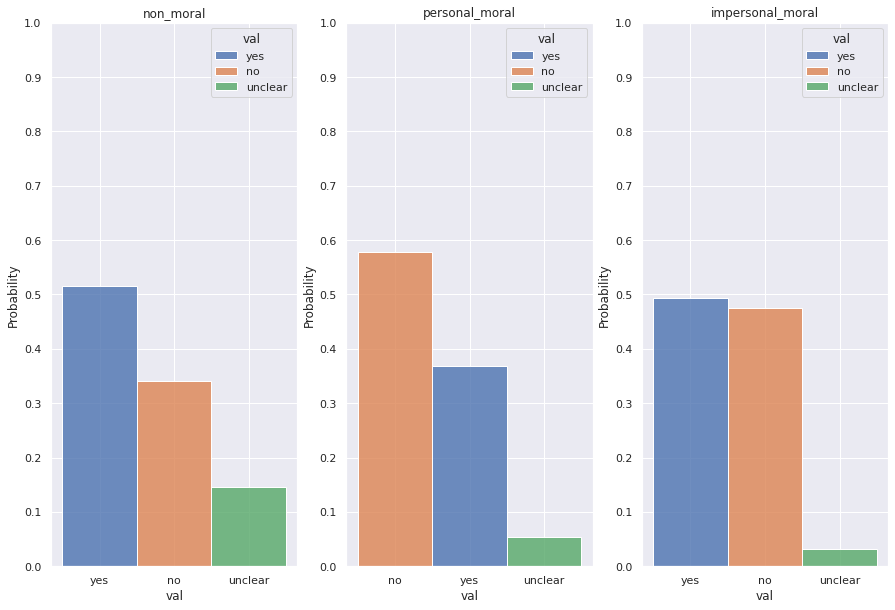

In [168]:
sns.set(rc={'figure.figsize':(15,10)})

exp = df['exp'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(exp))
# Draw a nested barplot by species and sex
for e, ax in zip(exp, axes.flat):
    sns.histplot(
        x='val', data=df[df['exp']==e], hue='val', hue_order=['yes', 'no', 'unclear'], stat='probability', alpha=.8, ax=ax)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0, 11)/10)
    ax.set_title(e)
# sns.displot(x='val', data=df, col='exp', hue='val', stat='probability', alpha=.8)
# sns.displot(x='val', data=df, col='exp', hue='val', stat='probability', alpha=.8)